In [ ]:
setwd("/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/data")

library(data.table)

source("/mnt/lareaulab/reliscu/code/analyzeSyntheticDatasets/makeSyntheticDatasets_0.53.r")

Here I make pseudobulk samples, where each sample contains a mix of cell types

In [117]:
counts <- fread("/mnt/lareaulab/reliscu/projects/NSF_GRFP/data/scRNA-seq/tasic_2018/ALM/tasic_2018_ALM_STAR_gene_counts.csv", data.table=FALSE)
cell_meta <- fread("/mnt/lareaulab/reliscu/projects/NSF_GRFP/data/scRNA-seq/tasic_2018/ALM/tasic_2018_ALM_STAR_sampleinfo.csv", data.table=FALSE)

In [118]:
all.equal(colnames(counts)[-1], cell_meta$Cell_ID)

[1] TRUE

In [119]:
sort(table(cell_meta$cell_subclass))


        L4       Peri         CR      Meis2        SMC       VLMC   Serpinf1 
         3          4         11         11         55         72         78 
Macrophage       Endo      Oligo        L6b       Sncg      Astro    L2/3 IT 
        85         96         98        145        148        215        325 
     L6 CT      L5 PT      L6 IT         NP      Pvalb      Lamp5        Sst 
       350        368        394        542        896        913       1139 
       Vip      L5 IT 
      1224       2401 

In [ ]:
cell.name = which(colnames(cell_meta) == "Cell_ID")
cell.type = which(colnames(cell_meta) == "cell_subclass")
# kappa <- 25
SD=20
pcnt.cells <- 20
# pcnt.var <- 40

cell_frac <- data.frame(table(cell_meta$cell_subclass) / nrow(cell_meta))
cell_meta$Freq <- cell_frac$Freq[match(cell_meta$cell_subclass, as.character(cell_frac[,1]))]
cell.frac = which(colnames(cell_meta) == "Freq")

In [ ]:
makeSyntheticDatasets(
    expr=counts,
    sampleindex=c(2:ncol(counts)),
    cell.info=cell_meta,
    cell.name=cell.name,
    cell.type=cell.type,
    cell.frac=cell.frac,
    pcnt.cells=pcnt.cells,
    SD=SD,
    no.samples=200,
    no.datasets=1,
    with.replacement=TRUE
)

In [121]:
# makeSyntheticDatasets(
#     expr=counts,
#     sampleindex=c(2:ncol(counts)),
#     cell.info=cell_meta,
#     cell.name=cell.name,
#     cell.type=cell.type,
#     cell.frac=cell.frac,
#     pcnt.cells=pcnt.cells,
#     pcnt.var=pcnt.var,
#     no.samples=200,
#     no.datasets=1,
#     with.replacement=TRUE
# )

In [122]:
# makeSyntheticDatasets(
#     expr=counts,
#     sampleindex=c(2:ncol(counts)),
#     cell.info=cell_meta,
#     cell.name=cell.name,
#     cell.type=cell.type,
#     pcnt.cells=pcnt.cells,
#     kappa=kappa,
#     no.samples=200,
#     no.datasets=1,
#     with.replacement=TRUE
# )

In [123]:
# Debugging

expr <- counts
sampleindex=c(2:ncol(counts))
cell.info=cell_meta
cell.name=cell.name
cell.type=cell.type
cell.frac=cell.frac
pcnt.cells=20
pcnt.var=75
no.samples=100
no.datasets=1
i=1
with.replacement=TRUE

## Check to ensure rows of cell.info and columns of expr are in same order:
if(all.equal(colnames(expr[,sampleindex]),as.character(cell.info[,cell.name]))!=TRUE){
    stop("Cell names in expr and cell.info do not match!")
}

no.cells=round(length(sampleindex)*pcnt.cells*.01)
meta=min(sampleindex)-1
print(paste("Building dataset ",i,"...",sep=""))

if(is.null(cell.type)){
    
    dat.legend=matrix(nrow=length(cell.info[,1]),ncol=no.samples+1,data=0)
    dat.legend[,1]=as.character(cell.info[,cell.name])
    colnames(dat.legend)=c("Cell.name",paste("Sample",c(1:no.samples),sep=""))
    leg.meta=1
    
} else {
    
    dat.legend=matrix(nrow=length(cell.info[,1]),ncol=no.samples+2,data=0)
    dat.legend[,1]=as.character(cell.info[,cell.name])
    dat.legend[,2]=as.character(cell.info[,cell.type])
    colnames(dat.legend)=c("Cell.name","Cell.type",paste("Sample",c(1:no.samples),sep=""))
    leg.meta=2
    
}

dat.synth=matrix(nrow=nrow(expr),ncol=no.samples,data=-88)
colnames(dat.synth)=paste("Sample",c(1:no.samples),sep="")


[1] "Building dataset 1..."


In [169]:
pcnt.var=1

In [170]:
all.ct=unique(as.character(cell.info[,cell.type]))
sample.vec=c()

for (ctype in all.ct) {
    k <- which(all.ct == ctype)
    rest1=is.element(cell.info[,cell.type],all.ct[k])
    base.cells=round(no.cells*unique(cell.info[rest1,cell.frac]))

    act.cell.range=c(round(base.cells-(base.cells*pcnt.var*.01)):round(base.cells+(base.cells*pcnt.var*.01)))
    n_sampled <- c()
    for (j in 1:no.samples) {
        act.cells=sample(act.cell.range[act.cell.range>=0 & act.cell.range<length(sampleindex)],1)
        n_sampled=c(n_sampled, act.cells)
    }
    sample.vec <- c(sample.vec, sd(n_sampled))
}

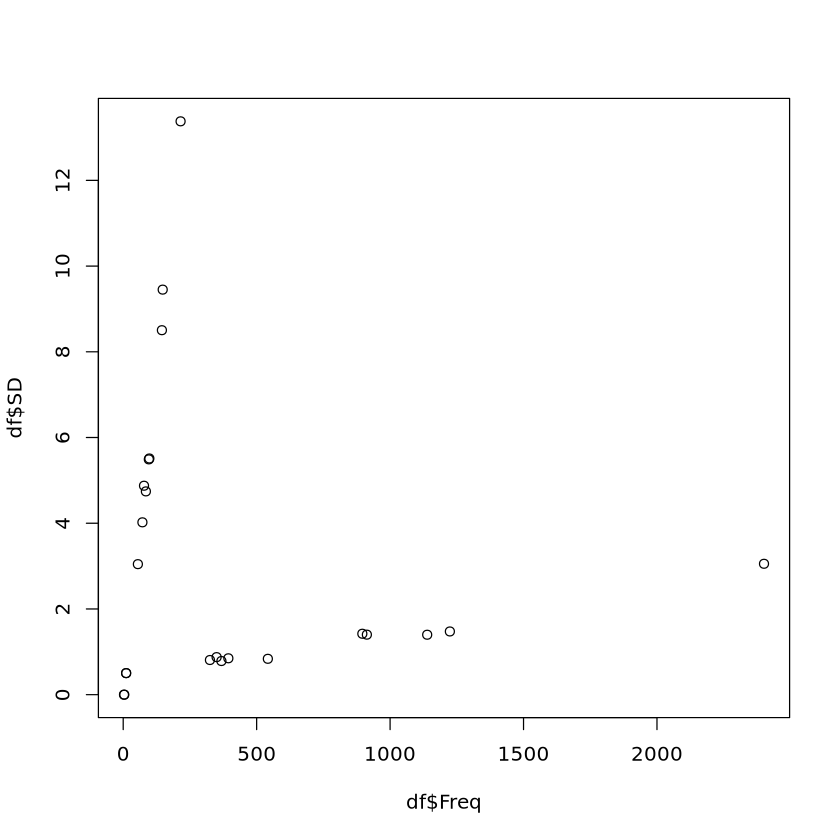

In [171]:
library(dplyr)

df1 <- data.frame(Var1=all.ct, SD=sample.vec)
df2 <- as.data.frame(table(cell_meta$cell_subclass))
df <- merge(df1, df2, by="Var1")
plot(df$Freq, df$SD)

In [178]:
all.ct=unique(as.character(cell.info[,cell.type]))
sample.vec=c()

for (ctype in all.ct) {
    k <- which(all.ct == ctype)
    rest1=is.element(cell.info[,cell.type],all.ct[k])
    base.cells=round(no.cells*unique(cell.info[rest1,cell.frac]))
    if (base.cells < 40) {
        base.cells <- base.cells + 40
    }
    ctype_frac=sum(rest1)/length(rest1)
    ctype_pcnt.var=sqrt(100/ctype_frac)

    act.cell.range=c(round(base.cells-ceiling(base.cells*ctype_pcnt.var*.01)):round(base.cells+ceiling(base.cells*ctype_pcnt.var*.01)))
    n_sampled <- c()
    for (j in 1:no.samples) {
        act.cells=sample(act.cell.range[act.cell.range>=0 & act.cell.range<length(sampleindex)],1)
        n_sampled=c(n_sampled, act.cells)
    }
    sample.vec <- c(sample.vec, sd(n_sampled))

}

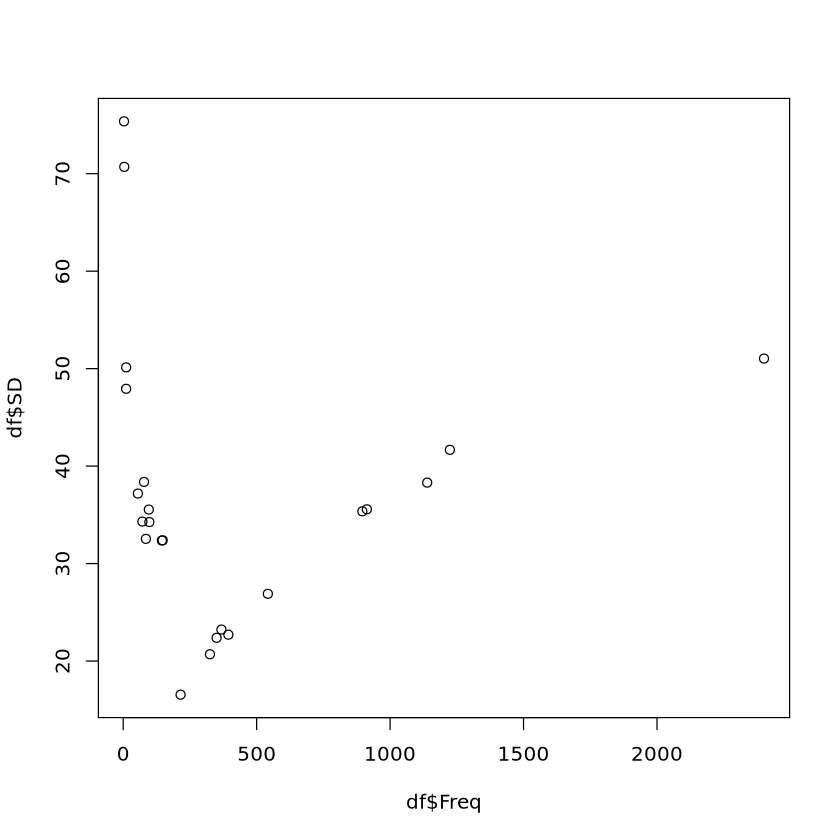

In [179]:
library(dplyr)

df1 <- data.frame(Var1=all.ct, SD=sample.vec)
df2 <- as.data.frame(table(cell_meta$cell_subclass))
df <- merge(df1, df2, by="Var1")
plot(df$Freq, df$SD)

In [186]:
all.ct=unique(as.character(cell.info[,cell.type]))
sample.vec=c()

SD=30

for (ctype in all.ct) {
    k <- which(all.ct == ctype)
    rest1=is.element(cell.info[,cell.type],all.ct[k])
    base.cells=round(no.cells*unique(cell.info[rest1,cell.frac]))
    # if (SD>base.cells) {
    #    base.cells=base.cells+SD 
    # }
    act.cells=max(rnorm(n=1, sd=30, mean=base.cells), 1)
    print(base.cells)
    print(act.cells)
    cat("\n")
    sample.vec=c(sample.vec, sd(samples))
}

[1] 65
[1] 13.47161

[1] 79
[1] 99.31963

[1] 74
[1] 2.148705

[1] 70
[1] 80.93742

[1] 480
[1] 457.0255

[1] 183
[1] 177.2329

[1] 228
[1] 250.5354

[1] 108
[1] 117.7227

[1] 245
[1] 215.7059

[1] 179
[1] 156.1321

[1] 43
[1] 60.56102

[1] 16
[1] 9.678442

[1] 2
[1] 30.15816

[1] 19
[1] 8.647374

[1] 14
[1] 1

[1] 29
[1] 31.22789

[1] 11
[1] 38.15167

[1] 20
[1] 1

[1] 17
[1] 8.946243

[1] 30
[1] 79.09107

[1] 2
[1] 1

[1] 1
[1] 25.39977

[1] 1
[1] 17.39904



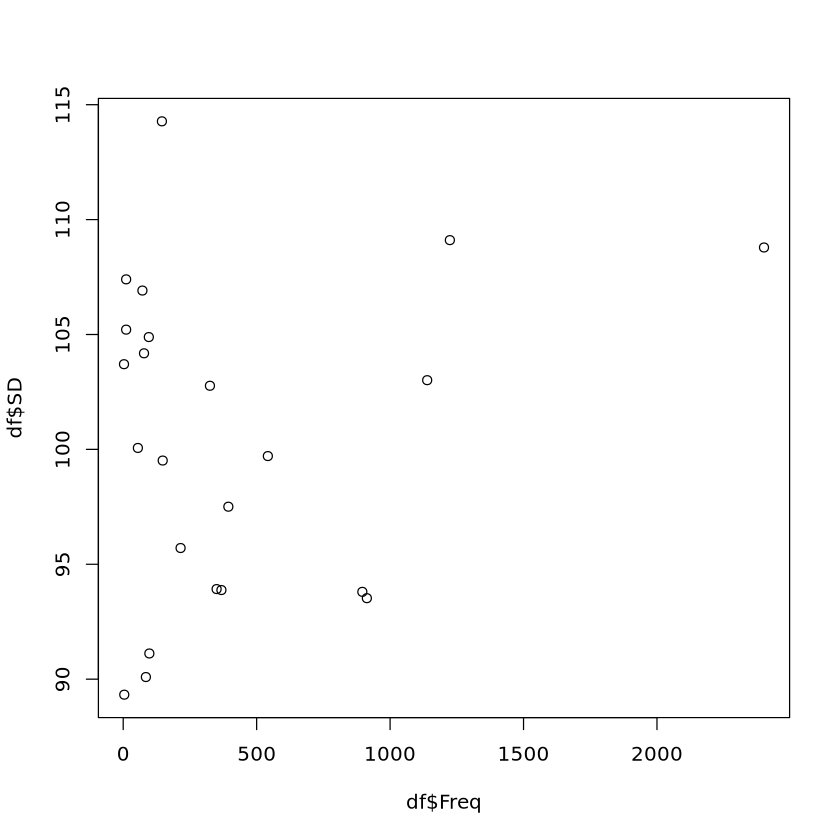

In [ ]:
library(dplyr)

df1 <- data.frame(Var1=all.ct, SD=sample.vec)
df2 <- as.data.frame(table(cell_meta$cell_subclass))
df <- merge(df1, df2, by="Var1")
plot(df$Freq, df$SD)

In [127]:
all.ct=unique(as.character(cell.info[,cell.type]))
sample.vec=c()

for (ctype in all.ct) {
    k <- which(all.ct == ctype)
    rest1=is.element(cell.info[,cell.type],all.ct[k])
    base.cells=round(no.cells*unique(cell.info[rest1,cell.frac]))
    # print(paste("base.cells:", base.cells))

    act.cell.range=c(round(base.cells-ceiling(base.cells*pcnt.var*.01)):round(base.cells+ceiling(base.cells*pcnt.var*.01)))
    # print(paste("act.cell.range:", min(act.cell.range), "to", max(act.cell.range)))

    n_sampled <- c()
    for (j in 1:no.samples) {
        act.cells=sample(act.cell.range[act.cell.range>=0 & act.cell.range<length(sampleindex)],1)
        n_sampled=c(n_sampled, act.cells)
    }
    sample.vec <- c(sample.vec, sd(n_sampled))

}

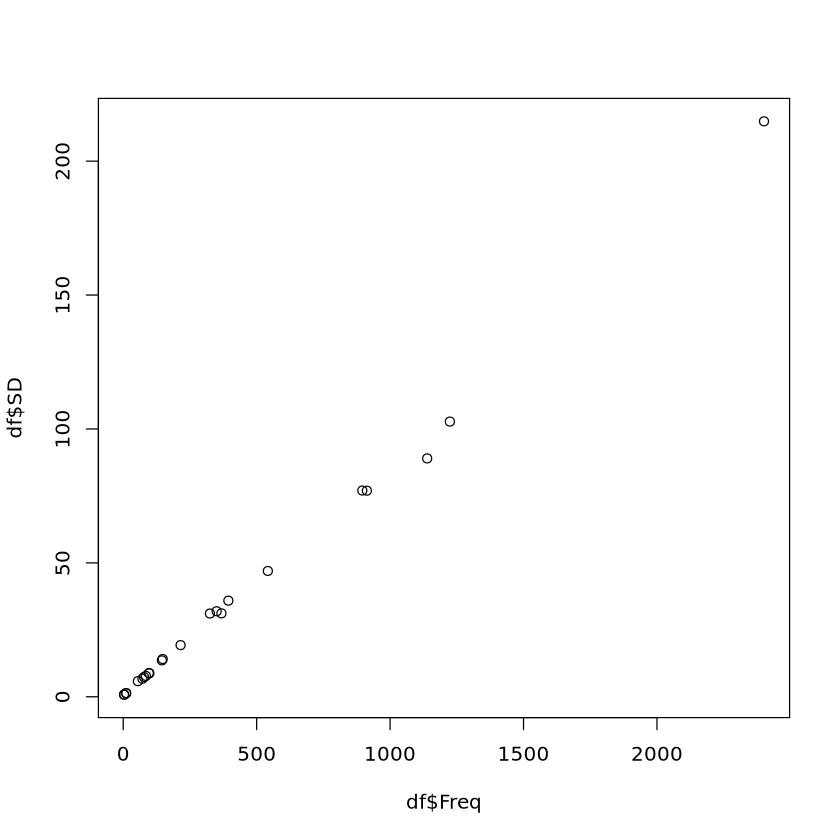

In [128]:
df1 <- data.frame(Var1=all.ct, SD=sample.vec)
df2 <- as.data.frame(table(cell_meta$cell_subclass))

df <- merge(df1, df2, by="Var1")
plot(df$Freq, df$SD)